In [1]:
library(ggplot2)
library(dplyr)
library(chron)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ERROR: Error in library(chron): there is no package called ‘chron’


In [2]:
data <- read.csv("traffic-data.csv")

In [3]:
data %>% nrow()

[1] 429982

In [4]:
data %>% names()

[1] "crawl_date"      "ad.aid"          "ad.bgcl"         "ad.bgcls"       
 [5] "ad.fncl"         "ad.fncls"        "ad.lid"          "ad.logo"        
 [9] "ad.logo2x"       "ad.logoAndroidS" "ad.logoAndroidH" "ad.cm"          
[13] "ad.url"          "ad.g"            "rd.nm"           "rd.ri"          
[17] "rd.stid"         "rd.hr"           "rd.mn"           "rd.new"         
[21] "rd.img"          "rd.cl"           "rd.strq"         "rd.cmrq"        
[25] "rd.rp.nm"        "rd.rp.fullnm"    "rd.rp.hr"        "rd.rp.mn"       
[29] "rd.rp.stid"      "rd.rp.cm"        "rd.rp.cmid"      "rd.rp.rpImg"    
[33] "rd.rp.img"       "rd.rp.type"

In [5]:
data$crawl_date <- as.POSIXct(strptime(data$crawl_date, format="%A %b %d %H:%M:%S UTC %Y"), tz='UTC')
data$crawl_date <- as.POSIXlt(data$crawl_date, tz="Africa/Cairo")

In [6]:
data$rd.mn %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    6.00   18.00   21.43   34.00   59.00    1507 

In [7]:
data$rd.rp.stid %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    2.00    3.00    4.71   10.00   10.00   13965 

In [8]:
data$rd.rp.hr %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   6.000   8.708  14.000 140.000 

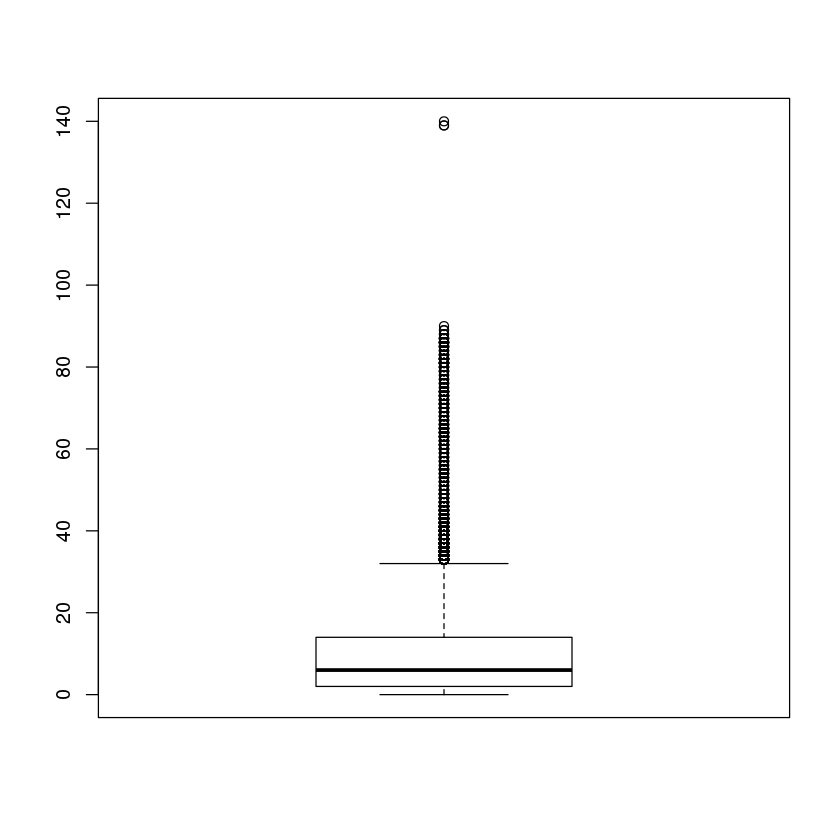

In [78]:
#When Is the report made before crawling (e.g 2 hr ago)
data$rd.rp.hr %>% boxplot()

In [79]:
#Calcualte actual report date
data$report_date        <- data$crawl_date
data$report_date$hour   <- (data$crawl_date$hour - data$rd.rp.hr) %% 24
data$report_date$minute <- data$crawl_date$minute - data$rd.rp.mn

In [11]:
data$report_date$hour %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   15.00   13.85   18.00   23.00 

In [83]:
#unique data
nm <- names(data)
nm <- m[!grepl("^ad|crawl_date", nm)]
data.unq <- data[!duplicated(data[, c('rd.rp.cmid')]), ]

In [84]:
data.unq %>% nrow()

[1] 148367

In [15]:
names(data)

[1] "crawl_date"      "ad.aid"          "ad.bgcl"         "ad.bgcls"       
 [5] "ad.fncl"         "ad.fncls"        "ad.lid"          "ad.logo"        
 [9] "ad.logo2x"       "ad.logoAndroidS" "ad.logoAndroidH" "ad.cm"          
[13] "ad.url"          "ad.g"            "rd.nm"           "rd.ri"          
[17] "rd.stid"         "rd.hr"           "rd.mn"           "rd.new"         
[21] "rd.img"          "rd.cl"           "rd.strq"         "rd.cmrq"        
[25] "rd.rp.nm"        "rd.rp.fullnm"    "rd.rp.hr"        "rd.rp.mn"       
[29] "rd.rp.stid"      "rd.rp.cm"        "rd.rp.cmid"      "rd.rp.rpImg"    
[33] "rd.rp.img"       "rd.rp.type"      "report_date"

In [16]:
nm

[1] "rd.nm"        "rd.ri"        "rd.stid"      "rd.hr"        "rd.mn"       
 [6] "rd.new"       "rd.img"       "rd.cl"        "rd.strq"      "rd.cmrq"     
[11] "rd.rp.nm"     "rd.rp.fullnm" "rd.rp.hr"     "rd.rp.mn"     "rd.rp.stid"  
[16] "rd.rp.cm"     "rd.rp.cmid"   "rd.rp.rpImg"  "rd.rp.img"    "rd.rp.type"  
[21] "report_date"

In [17]:
length(unique(data$rd.rp.cmid))

[1] 148367

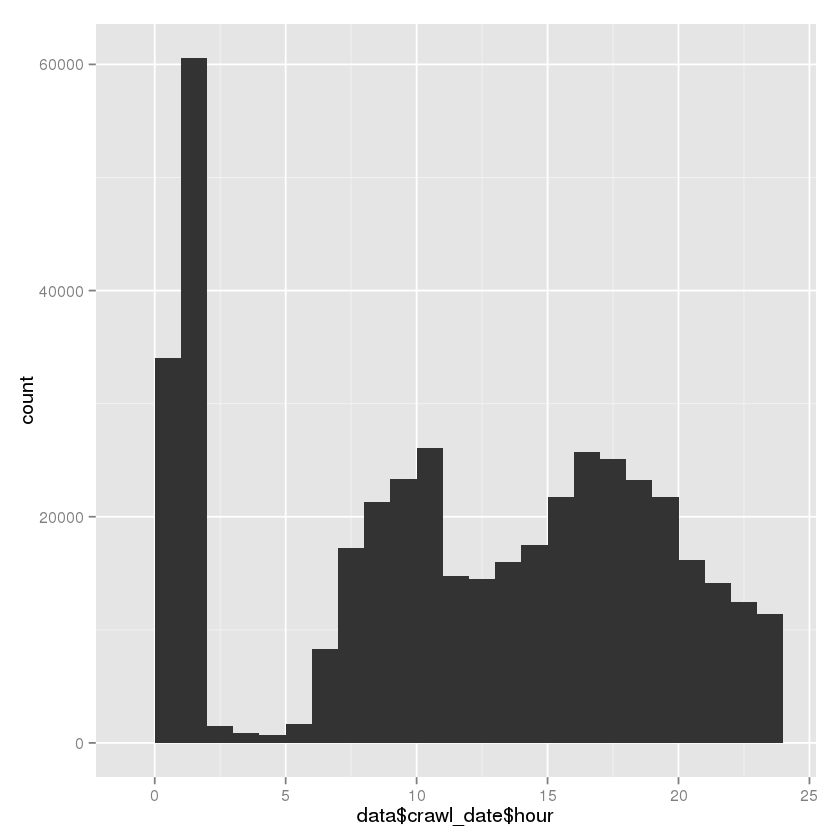

In [52]:
qplot(data$crawl_date$hour, geom="histogram", binwidth=1)

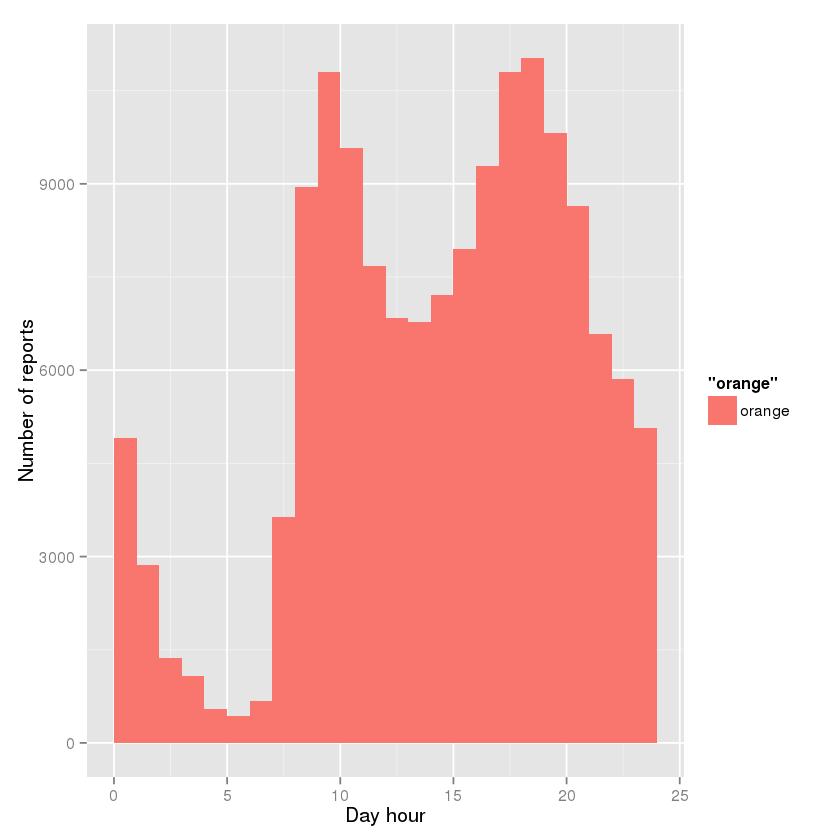

In [53]:
#Rush hours can be clearly seen here.
qplot(data.unq$report_date$hour, geom="histogram", binwidth=1, xlim=c(0,24), fill='orange', xlab='Day hour', ylab='Number of reports')

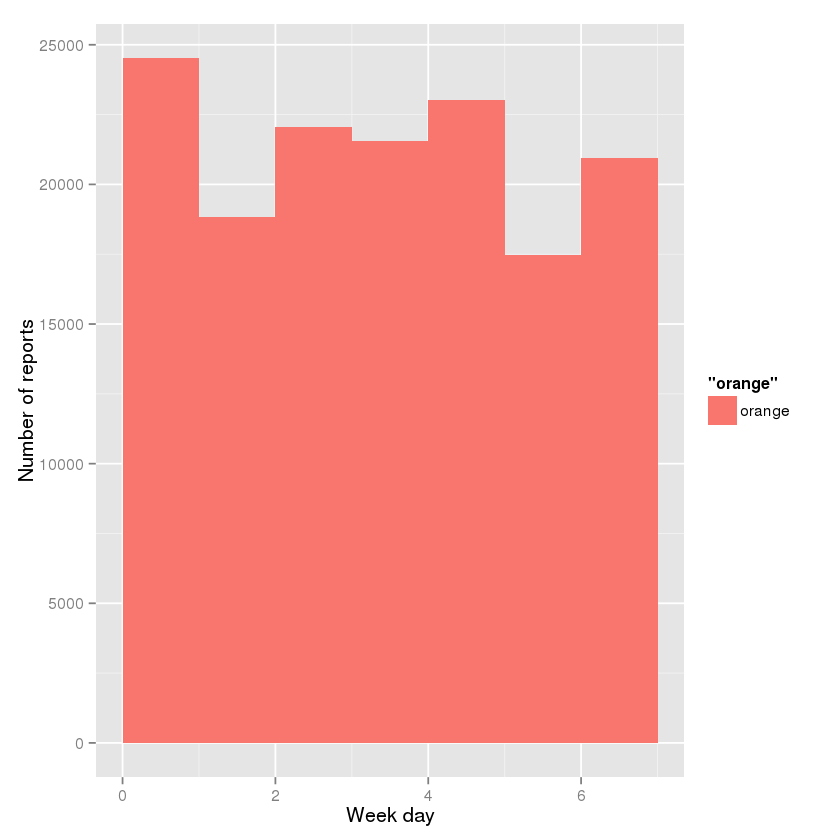

In [54]:
# 0 is Sunday which has the most reports. Friday has the lowest number of reports.
qplot(data.unq$report_date$wday, geom="histogram", binwidth=1, xlim=c(0,7), fill='orange', xlab='Week day', ylab='Number of reports')

In [69]:
data.weekend <- data.unq[data.unq$report_date$wday >= 5, ]
data.workday <- data.unq[data.unq$report_date$wday < 5, ]

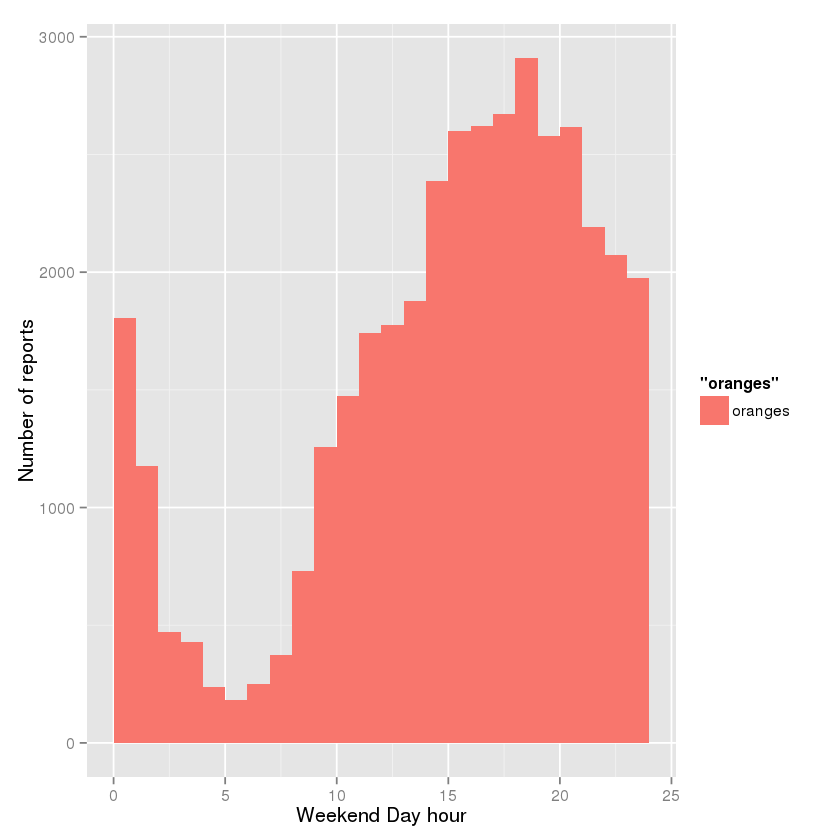

In [75]:
#Rush hours can be clearly seen here.
qplot(data.weekend$report_date$hour, geom="histogram", binwidth=1, xlim=c(0,24), fill='orange', xlab='Weekend Day hour', ylab='Number of reports')

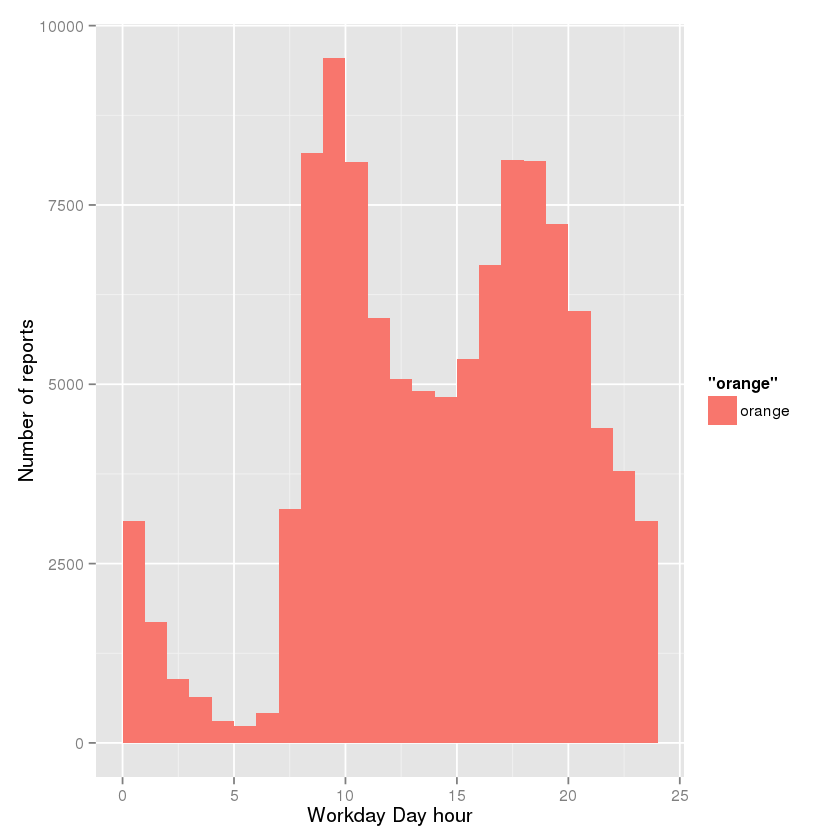

In [77]:
#Rush hours can be clearly seen here.
qplot(data.workday$report_date$hour, geom="histogram", binwidth=1, xlim=c(0,24), fill='orange', xlab='Workday Day hour', ylab='Number of reports')

In [21]:
data[c('report_date', 'crawl_date')] %>% head()

,report_date,crawl_date
1,2016-02-04 23:23:57,2016-02-05 17:23:57
2,2016-02-04 21:23:57,2016-02-05 17:23:57
3,2016-02-04 19:23:57,2016-02-05 17:23:57
4,2016-02-04 18:23:57,2016-02-05 17:23:57
5,2016-02-05 09:01:00,2016-02-06 08:01:00
6,2016-02-05 04:01:00,2016-02-06 08:01:00


In [ ]:
#People tend to drive in the weekend beleel 3an el workdays